##Detectando e Prevenindo Ataques de SQL Injection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/CursoIACyber
!ls

/content/drive/MyDrive/CursoIACyber
dados  modelos	Projeto5.ipynb	Projeto9.ipynb


## Instalando e Carregando os Pacotes

In [ ]:
import pickle
import sklearn
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## Carregando os Dados

In [ ]:
# Carrega o dataset de queries SQL submetidas a um banco de dados
dados_sql = pd.read_csv("dados/dados_sql.csv", encoding = 'utf-8')

In [ ]:
# Shape
dados_sql.shape

(30919, 2)

In [ ]:
# Info
dados_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


## Análise Exploratória e Limpeza de Dados

In [ ]:
# Verificando registros duplicados
dados_sql.duplicated(subset = ['Query', 'Label']).sum()

12

In [ ]:
# Verificando valores ausentes
dados_sql.isnull().sum()

Query    0
Label    0
dtype: int64

In [ ]:
# Removendo registros duplicados
dados_sql.drop_duplicates(inplace = True)

In [ ]:
# Contagem de classe
dados_sql.Label.value_counts()

0    19529
1    11378
Name: Label, dtype: int64

In [ ]:
# Resumo
print(f"Queries SQL Seguras: {dados_sql['Label'].value_counts()[0]}")
print(f"Queries SQL Maliciosas: {dados_sql['Label'].value_counts()[1]}")
print(f"Shape do Dataset: {dados_sql.shape}")

Queries SQL Seguras: 19529
Queries SQL Maliciosas: 11378
Shape do Dataset: (30907, 2)


## Pré-Processamento dos Dados e Vetorização

In [ ]:
# Separa X e Y
X = dados_sql['Query']
y = dados_sql['Label']

In [ ]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 1)

TfidfVectorizer() usado abaixo, é uma classe da biblioteca scikit-learn usada para converter uma coleção de documentos de texto brutos em uma matriz de recursos TF-IDF.

Aqui está uma explicação mais detalhada dos componentes:

TF (Term Frequency): É a frequência de uma palavra em um documento. Se uma palavra ocorrer frequentemente em um documento, seu valor de term frequency será alto.

IDF (Inverse Document Frequency): É o inverso da frequência de documentos que contêm a palavra específica. Se uma palavra ocorrer em muitos documentos, seu valor IDF será baixo; se ocorrer em poucos documentos, o valor será alto. Isso ajuda a dar mais peso às palavras que são mais exclusivas para um documento específico, ao mesmo tempo em que reduz o peso de palavras comuns (como "o", "é", "em", etc.) que não acrescentam muito valor informativo.

A combinação de TF e IDF (TF-IDF) permite que as palavras sejam ponderadas de acordo com o quão importantes elas são para um documento específico em um conjunto de documentos.

TfidfVectorizer() faz todo o processo de calcular TF, IDF e converter os documentos em uma matriz TF-IDF.

In [ ]:
# Cria o vetorizador
vectorizer = TfidfVectorizer()

In [ ]:
# Fit e Transform do vetorizador com dados de treino
X_treino = vectorizer.fit_transform(X_treino)

In [ ]:
# Transform do vetorizador com dados de teste
X_teste = vectorizer.transform(X_teste)

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000001', '000003', ..., 'zzip', 'zzkx', 'ã½'], dtype=object)

In [ ]:
# Array de treino
X_treino.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Array de teste
X_teste.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Modelagem Preditiva

Vamos construir 6 versões do modelo de Machine Learning usando 6 diferentes algoritmos. Ao final, vamos compará-las e então selecionar a melhor versão do modelo.

#### Fórmulas das Métricas de Avaliação dos Modelos:

> accuracy = (TP + TN) / (TP + TN + FP + FN)

> Precision = TP / (TP + FP)

> Recall = TP / (TP + FN)

> F1-score = 2 * (Precision * Recall) / (Precision + Recall)

In [ ]:
# Função de cálculo das métricas
def avalia_modelo(model_pred, model_name:str, y_test = y_teste):

    confusion = confusion_matrix(y_test, model_pred)

    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negative
    FP = confusion[1,0] # false positive
    FN = confusion[0,1] # false negative

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Avaliação do Modelo de {model_name}")
    print("--------------------------------------")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print("--------------------------------------")

### Versão 1 do Modelo - Regressão Logística

A regressão logística é um algoritmo de aprendizado supervisionado usado para problemas de classificação. É um algoritmo estatístico que visa prever a probabilidade de um evento ocorrer, dada uma série de variáveis de entrada, produzindo um valor entre 0 e 1.

Aqui estão alguns pontos-chave sobre a regressão logística:

Classificação binária: A regressão logística é usada principalmente para classificação binária, onde o resultado alvo tem dois possíveis estados (como 0/1, verdadeiro/falso, sucesso/falha). No entanto, também pode ser adaptada para problemas de classificação multiclasse.

Probabilidade de evento: A regressão logística estima a probabilidade de uma instância específica pertencer a uma classe específica.

Função logística: A regressão logística usa uma função logística para transformar sua saída e garantir que ela esteja entre 0 e 1. Isso é feito aplicando a função logística (também conhecida como função sigmóide) à combinação linear das características de entrada.

Estimação de coeficientes: O algoritmo usa o método de máxima verossimilhança para estimar os coeficientes que maximizam a probabilidade dos dados observados.

Interpretabilidade: Os coeficientes em uma regressão logística podem ser interpretados em termos de chances (odds ratios), o que torna este método útil em campos como medicina e ciências sociais.

Regularização: A regressão logística pode incluir a regularização L1 (Lasso) ou L2 (Ridge) para ajudar a prevenir o sobreajuste, tornando alguns coeficientes de características zero (Lasso) ou reduzindo a magnitude dos coeficientes (Ridge).

Limitações: A regressão logística assume que há uma relação linear entre as características de entrada e o logaritmo da chance. Se essa suposição não for verdadeira, o modelo pode ter um desempenho ruim. Além disso, a regressão logística pode não funcionar bem quando as características de entrada são altamente correlacionadas ou quando há interações complexas entre as características.

In [ ]:
# Versão 1 do Modelo - Regressão Logística

# Cria o modelo
modelo_v1_lr = LogisticRegression()

# Treina o modelo
modelo_v1_lr.fit(X_treino, y_treino)

# Faz previsões com o modelo
v1_lr_pred = modelo_v1_lr.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v1_lr_pred, "Regressão Logística")

Avaliação do Modelo de Regressão Logística
--------------------------------------
Accuracy: 0.97239296883425
Precision: 0.9376430205949656
Recall: 0.98854041013269
F1-score: 0.9624192601291838
--------------------------------------


### Versão 2 do Modelo - Árvore de Decisão

Uma árvore de decisão é um algoritmo de aprendizado supervisionado usado tanto para problemas de classificação quanto de regressão. Ela funciona dividindo os dados em subconjuntos com base em diferentes valores de atributos. Isso é realizado através de uma estrutura de árvore hierárquica que modela decisões e suas possíveis consequências.

Aqui estão alguns pontos-chave sobre árvores de decisão:

Divisões baseadas em atributos: Uma árvore de decisão faz divisões binárias nos dados. Cada nó na árvore representa uma decisão baseada em um atributo, dividindo os dados em dois ramos com base nessa decisão.

Folhas representam previsões: As folhas da árvore representam as previsões, que são a média do valor alvo (em caso de regressão) ou a classe mais comum (em caso de classificação) dos exemplos naquela folha.

Estrutura de árvore: As árvores de decisão são fáceis de entender e visualizar, já que podem ser desenhadas como uma árvore e seguidas desde a raiz até uma folha para fazer uma previsão.

Importância do atributo: As árvores de decisão fornecem insights sobre a importância dos atributos, uma vez que os atributos usados nas divisões superiores da árvore contribuem mais para a decisão final do que os utilizados mais abaixo na árvore.

Não linear: As árvores de decisão podem modelar relacionamentos não lineares e interações entre atributos.

Sobreajuste: As árvores de decisão são propensas ao sobreajuste, especialmente se a árvore for permitida a crescer de maneira irrestrita. Isso pode ser controlado por meio de técnicas como poda, definindo a profundidade máxima da árvore ou definindo o número mínimo de amostras por folha.

Insensível à escala: As árvores de decisão não exigem que os dados sejam normalizados ou escalonados e são insensíveis à distribuição dos dados.

Limitações: As árvores de decisão podem ser instáveis, ou seja, pequenas mudanças nos dados podem resultar em árvores de decisão significativamente diferentes. Além disso, elas podem ter um desempenho ruim se a fronteira de decisão é diagonal ou envolve combinações complexas de atributos.

In [ ]:
# Versão 2 do Modelo - Árvore de Decisão

# Cria o modelo
modelo_v2_dt = DecisionTreeClassifier()

# Treina o modelo
modelo_v2_dt.fit(X_treino, y_treino)

# Faz previsões com o modelo
v2_dt_pred = modelo_v2_dt.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v2_dt_pred, "Árvore de Decisão")

Avaliação do Modelo de Árvore de Decisão
--------------------------------------
Accuracy: 0.7878787878787878
Precision: 0.9445080091533181
Recall: 0.6506403940886699
F1-score: 0.770505191926263
--------------------------------------


### Versão 3 do Modelo - Random Forest

Random Forest é um algoritmo de aprendizado de máquina supervisionado utilizado tanto para tarefas de classificação quanto de regressão. Ele é conhecido como um "ensemble learning method", pois combina várias árvores de decisão para produzir uma previsão mais precisa e robusta.

Aqui estão alguns pontos-chave sobre Random Forest:

Ensemble de Árvores de Decisão: Um Random Forest é composto por um conjunto (ou "floresta") de árvores de decisão individuais, cada uma treinada em uma amostra aleatória dos dados. A amostra é selecionada com substituição, um processo conhecido como "bootstrap".

Diversidade através de Randomização: Cada árvore na floresta é única através do uso de seleção aleatória de recursos para cada divisão ao construir a árvore. Isso cria diversidade nas árvores e ajuda a evitar o sobreajuste.

Votação de árvores: Para fazer uma previsão, o Random Forest faz com que cada uma de suas árvores de decisão faça uma previsão individualmente. No caso da classificação, a classe que recebe a maioria dos votos é a previsão do Random Forest. No caso da regressão, a média das previsões das árvores é tomada.

Avaliação do desempenho: O Random Forest tem uma maneira incorporada de avaliar seu desempenho chamada "out-of-bag" (OOB) score. Cada árvore é treinada em uma amostra bootstrap dos dados e a previsão é testada nas observações não incluídas nessa amostra (o "out-of-bag" sample).

Importância do recurso: Random Forest é capaz de medir a importância dos recursos observando quanto a perda de precisão ocorre quando os valores de um recurso são permutados aleatoriamente. Recursos mais importantes resultarão em uma maior perda de precisão.

Modelagem não linear e interações: Random Forest é capaz de modelar relacionamentos não lineares e capturar interações entre recursos.

Robustez e facilidade de uso: Random Forest é conhecido por sua robustez e geralmente produz bons resultados, mesmo sem a sintonização fina de parâmetros. Ele também lida bem com dados faltantes e não é muito afetado por outliers.

Limitações: Random Forest pode ser computacionalmente intensivo e lento para prever se o número de árvores é grande. Além disso, enquanto Random Forest é capaz de lidar com dados categóricos, ele pode ter dificuldade com categorias com muitos níveis.



In [ ]:
# Versão 3 do Modelo - RandomForest

# Cria o modelo
modelo_v3_rf = RandomForestClassifier()

# Treina o modelo
modelo_v3_rf.fit(X_treino, y_treino)

# Faz previsões com o modelo
v3_rf_pred = modelo_v3_rf.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v3_rf_pred, "Random Forest")

Avaliação do Modelo de Random Forest
--------------------------------------
Accuracy: 0.8013587835651893
Precision: 0.9945652173913043
Recall: 0.6560377358490566
F1-score: 0.7905866302864938
--------------------------------------


### Versão 4 do Modelo - Support Vector Machines

As Máquinas de Vetores de Suporte (Support Vector Machines, SVM) são um conjunto de métodos de aprendizado supervisionado usados para classificação e regressão. Em particular, eles são altamente eficazes em problemas de classificação binária. O principal objetivo do SVM é encontrar um hiperplano de separação ótimo que maximiza a margem entre as classes em um espaço de recursos.

Aqui estão alguns pontos-chave sobre o SVM:

Hiperplano de separação: O SVM busca um hiperplano que separa as classes de dados com a maior margem possível. O hiperplano é escolhido para maximizar a distância dos exemplos de treinamento mais próximos de cada classe, conhecidos como "vetores de suporte".

Maximização da Margem: O objetivo de maximizar a margem proporciona alguma robustez à classificação e ajuda a prevenir o sobreajuste, fazendo do SVM um classificador robusto.

Kernel Trick: Para dados que não são linearmente separáveis, o SVM usa uma técnica conhecida como "kernel trick" para projetar os dados em um espaço de maior dimensão onde eles se tornam linearmente separáveis. Isso permite que o SVM modele relações complexas e não lineares.

Classificação e Regressão: Embora o SVM seja mais conhecido por classificação, ele também pode ser usado para regressão (Support Vector Regression, SVR) e outras tarefas, como detecção de outliers.

Regularização: O SVM inclui um parâmetro de regularização 'C' que permite ao usuário especificar a quantidade de erros de classificação e a largura da margem, ajudando a evitar o sobreajuste.

Limitações: As SVMs podem ser sensíveis à escolha do kernel e aos parâmetros do kernel. Além disso, elas podem ser computacionalmente intensivas e menos escaláveis para conjuntos de dados de grande dimensão ou com grande quantidade de recursos. SVMs também fornecem previsões binárias em vez de probabilidades.

Necessidade de Pré-processamento: Os dados para SVM precisam ser pré-processados, pois o algoritmo é sensível à escala das características. Normalmente, os dados são normalizados antes de serem usados no SVM.

In [ ]:
# Versão 4 do Modelo - Support Vector Machines

# Cria o modelo
modelo_v4_svm = SVC()

# Treina o modelo
modelo_v4_svm.fit(X_treino, y_treino)

# Faz previsões com o modelo
v4_svm_pred = modelo_v4_svm.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v4_svm_pred, "Support Vector Machines")

Avaliação do Modelo de Support Vector Machines
--------------------------------------
Accuracy: 0.8208778173190985
Precision: 0.9711098398169337
Recall: 0.6851664984863775
F1-score: 0.8034552124008992
--------------------------------------


### Versão 5 do Modelo - Multinomial Naive Bayes

Multinomial Naive Bayes é um algoritmo de aprendizado de máquina supervisionado baseado na aplicação do teorema de Bayes com a suposição de "naividade", ou seja, supondo independência entre cada par de recursos. Esta variante do Naive Bayes é mais adequada para dados que podem ser facilmente transformados em contagens, como contagens de palavras em textos.

Aqui estão alguns pontos-chave sobre o Multinomial Naive Bayes:

Teorema de Bayes: A base do Multinomial Naive Bayes é o teorema de Bayes, que descreve a probabilidade de um evento com base em conhecimentos anteriores relevantes.

Independência de recursos: O Naive Bayes assume que todos os recursos são mutuamente independentes. Na prática, essa suposição raramente é válida, mas o algoritmo ainda tende a funcionar bem.

Dados de contagem: Multinomial Naive Bayes é particularmente útil para dados que representam contagens ou frequências, como contagem de palavras em documentos de texto.

Aprendizado e previsão rápidos: Devido à sua simplicidade e suposição de independência de recursos, o Multinomial Naive Bayes é rápido para treinar e fazer previsões.

Uso comum em classificação de texto: Um uso comum do Multinomial Naive Bayes é na classificação de texto, onde os recursos são palavras e os dados são contagens ou frequências dessas palavras em documentos.

Suavização de Laplace: Para lidar com recursos que não aparecem no conjunto de treinamento e evitar probabilidades zero, o Multinomial Naive Bayes usa uma técnica conhecida como suavização de Laplace ou adição de um.

Limitações: Embora seja rápido e frequentemente surpreendentemente preciso, o Multinomial Naive Bayes pode ser superado por modelos mais complexos em tarefas que violam fortemente a suposição de independência de recursos. Além disso, não funciona bem com contagens de recursos muito grandes ou contínuas.


In [ ]:
# Versão 5 do Modelo - Multinomial Naive Bayes

# Cria o modelo
modelo_v5_nb = MultinomialNB()

# Treina o modelo
modelo_v5_nb.fit(X_treino, y_treino)

# Faz previsões com o modelo
v5_nb_pred = modelo_v5_nb.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v5_nb_pred, "Multinomial Naive Bayes")

Avaliação do Modelo de Multinomial Naive Bayes
--------------------------------------
Accuracy: 0.9682950501455839
Precision: 0.9407894736842105
Recall: 0.9742298578199052
F1-score: 0.9572176949941793
--------------------------------------


### Versão 6 do Modelo - Gradient Boosting

O Gradient Boosting é um poderoso algoritmo de aprendizado de máquina supervisionado usado principalmente para tarefas de regressão e classificação. É um método de "ensemble learning" que constrói um modelo preditivo de maneira aditiva e iterativa, buscando reduzir continuamente o erro residual da previsão.

Aqui estão alguns pontos-chave sobre o Gradient Boosting:

Ensemble de Aprendizes Fracos: O Gradient Boosting constrói um conjunto de "aprendizes fracos" (geralmente árvores de decisão), onde cada aprendiz é treinado para corrigir os erros feitos pelos aprendizes anteriores.

Modelo Aditivo: Cada novo aprendiz é adicionado ao modelo de forma a minimizar a função de perda global. A ideia é que, à medida que mais e mais aprendizes são adicionados, o modelo se torna cada vez mais preciso.

Descida de Gradiente: A técnica de otimização usada para minimizar a função de perda é a descida de gradiente, daí o nome "Gradient Boosting". Basicamente, em cada etapa, o algoritmo ajusta o modelo na direção que reduzirá mais rapidamente a função de perda.

Regularização: O Gradient Boosting inclui vários mecanismos de regularização para prevenir o sobreajuste, como a adição de uma penalidade de complexidade de modelo no critério de otimização e o uso de uma taxa de aprendizado (também conhecida como "shrinkage" ou "learning rate").

Manipulação de Dados Variados: O Gradient Boosting pode manipular dados com características mistas (numéricas e categóricas) e não é afetado por características irrelevantes ou escalas de características variadas.

Performance: O Gradient Boosting é conhecido por sua alta performance e é frequentemente o algoritmo de escolha em competições de aprendizado de máquina.

Desvantagens: A principal desvantagem do Gradient Boosting é que ele pode ser computacionalmente intensivo e requer cuidadosa sintonia dos hiperparâmetros. Além disso, devido à sua natureza sequencial, pode ser mais difícil de paralelizar do que outros algoritmos de "ensemble learning", como o Random Forest.

In [ ]:
# Versão 6 do Modelo - Gradient Boosting

# Cria o modelo
modelo_v6_gb = GradientBoostingClassifier(n_estimators = 20,
                                          learning_rate = 0.8,
                                          max_features = 2,
                                          max_depth = 2,
                                          random_state = 0)

# Treina o modelo
modelo_v6_gb.fit(X_treino, y_treino)

# Faz previsões com o modelo
v6_gb_pred = modelo_v6_gb.predict(X_teste)

In [ ]:
# Executa a função de avaliação
avalia_modelo(v6_gb_pred, "Gradient Boosting")

Avaliação do Modelo de Gradient Boosting
--------------------------------------
Accuracy: 0.6267658794349186
Precision: 0.010297482837528604
Recall: 0.972972972972973
F1-score: 0.020379281064251343
--------------------------------------


## Comparação e Seleção do Melhor Modelo

In [ ]:
# Dicionários para as métricas
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}

In [ ]:
# Atualiza o dicionário de métricas

f1_dict["LogisticRegression"] = f1_score(v1_lr_pred, y_teste)
precision_dict["LogisticRegression"] = precision_score(v1_lr_pred, y_teste)
recall_dict["LogisticRegression"] = recall_score(v1_lr_pred, y_teste)
accuracy_dict['LogisticRegression'] = accuracy_score(v1_lr_pred, y_teste)

f1_dict["DecisionTree"] = f1_score(v2_dt_pred, y_teste)
precision_dict["DecisionTree"] = precision_score(v2_dt_pred, y_teste)
recall_dict["DecisionTree"] = recall_score(v2_dt_pred, y_teste)
accuracy_dict['DecisionTree'] = accuracy_score(v2_dt_pred, y_teste)

f1_dict["RandomForest"] = f1_score(v3_rf_pred, y_teste)
precision_dict["RandomForest"] = precision_score(v3_rf_pred, y_teste)
recall_dict["RandomForest"] = recall_score(v3_rf_pred, y_teste)
accuracy_dict['RandomForest'] = accuracy_score(v3_rf_pred, y_teste)

f1_dict["SVM"] = f1_score(v4_svm_pred, y_teste)
precision_dict["SVM"] = precision_score(v4_svm_pred, y_teste)
recall_dict["SVM"] = recall_score(v4_svm_pred, y_teste)
accuracy_dict['SVM'] = accuracy_score(v4_svm_pred, y_teste)

f1_dict["NaiveBayes"] = f1_score(v5_nb_pred, y_teste)
precision_dict["NaiveBayes"] = precision_score(v5_nb_pred, y_teste)
recall_dict["NaiveBayes"] = recall_score(v5_nb_pred, y_teste)
accuracy_dict['NaiveBayes'] = accuracy_score(v5_nb_pred, y_teste)

f1_dict["GradientBoosting"] = f1_score(v6_gb_pred, y_teste)
precision_dict["GradientBoosting"] = precision_score(v6_gb_pred, y_teste)
recall_dict["GradientBoosting"] = recall_score(v6_gb_pred, y_teste)
accuracy_dict['GradientBoosting'] = accuracy_score(v6_gb_pred, y_teste)

In [ ]:
# Os nomes das chaves serão os nomes dos dicionários
chaves = f1_dict, precision_dict, recall_dict, accuracy_dict

# Métricas
metricas = ['F1_Score', 'Precision', 'Recall', 'Accuracy']

# Dataframe
tabela_metricas = pd.DataFrame(chaves)

# Índice
tabela_metricas.index = metricas

# Tabela de métricas
tabela_metricas

,LogisticRegression,DecisionTree,RandomForest,SVM,NaiveBayes,GradientBoosting
F1_Score,0.962419,0.770505,0.790587,0.803455,0.957218,0.020379
Precision,0.937643,0.944508,0.994565,0.971110,0.940789,0.010297
Recall,0.988540,0.650640,0.656038,0.685166,0.974230,0.972973
Accuracy,0.972393,0.787879,0.801359,0.820878,0.968295,0.626766


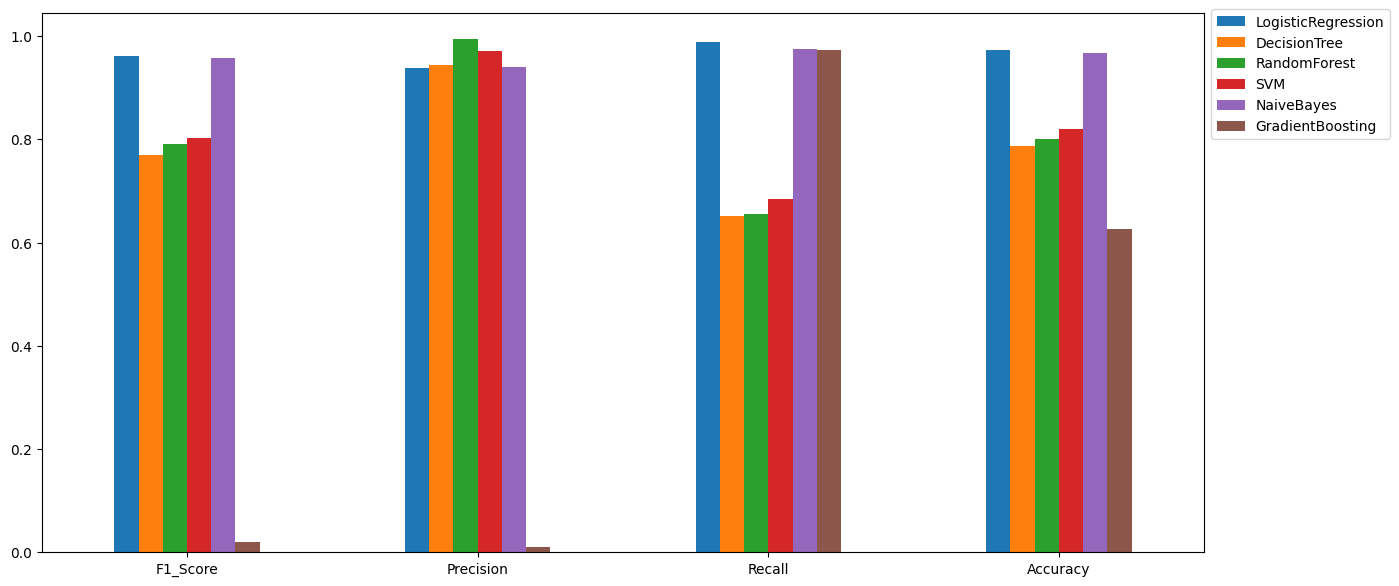

In [ ]:
# Gráfico da tabela de métricas
resultado = tabela_metricas.plot(kind = 'bar', rot = 0, figsize = (15, 7))
resultado.legend(bbox_to_anchor = (1, 1.02), loc = 'upper left');

In [ ]:
# Salva o vetorizador
with open('modelos/vectorizer', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [ ]:
# Salva o melhor modelo
pickle.dump(modelo_v5_nb, open("modelos/naiveBaies.pkl", "wb"))
pickle.dump(modelo_v1_lr, open("modelos/logisticRegression.pkl", "wb"))

## Uso do Modelo em Novas Tentativas de Ataque SQL Injection

In [ ]:
# Carrega o vetorizador
vetorizador_final = pickle.load(open("modelos/vectorizer", 'rb'))

In [ ]:
# Carrega o modelo
modelo_final = pickle.load(open("modelos/logisticRegression.pkl", "rb"))

In [ ]:
# Carrega os novos dados
with open("dados/novos_dados_sql.txt", "r") as file:
    lines = file.readlines()

In [ ]:
# Cria o dataframe
novos_dados = pd.DataFrame(lines, columns = ['Query'])

In [ ]:
# Limpa os dados
novos_dados = novos_dados.replace("\n", "", regex = True)

In [ ]:
novos_dados

,Query
0,"'UNION SELECT user, password FROM users#"
1,"1 or 1=1 UNION SELECT user, password FROM users#"
2,"1'UNION SELECT user, password FROM users#"
3,1 or sleep(4)#
4,"1' benchmark(10000000,MD5(1))#"
5,5--
6,"SELECT username, password FROM users"


In [ ]:
# Aplica o vetorizador
sql_query = vetorizador_final.transform(novos_dados['Query'])

In [ ]:
# Faz a previsão
resultados = modelo_final.predict(sql_query)

In [ ]:
resultados

array([1, 1, 1, 1, 1, 0, 0])

In [ ]:
# Inicializa os contadores
count_malicious = 0
count_safe = 0

In [ ]:
# Loop
print("Previsões do Modelo:\n")
for resultado in resultados:
    if resultado == 1:
        count_malicious = count_malicious + 1
        print("1")
    else:
        count_safe = count_safe + 1
        print("0")

Previsões do Modelo:

1
1
1
1
1
0
0


> Exemplo com uma nova instrução SQL.

In [ ]:
# Instrução SQL
input_val = "1, ( select  ( case when  ( 1609 = 1609 )  then waitfor delay '0:0:5' else 1609* ( select 1609 from master..sysdatabases )  end  )  )  "

In [ ]:
# Prepara a lista
input_val = [input_val]

In [ ]:
# Aplica o vetorizador
input_val = vetorizador_final.transform(input_val).toarray()

In [ ]:
# Faz a previsão
resultado = modelo_final.predict(input_val)

In [ ]:
resultado

array([1])

In [ ]:
if resultado == 0:
    print("A Query Provavelmente é Segura!")
elif resultado == 1:
    print("A Query Provavelmente é Maliciosa! Pode Ser um Ataque de SQL Injection!")
else:
    print("Valor inválido")

A Query Provavelmente é Maliciosa! Pode Ser um Ataque de SQL Injection!


#Testando com outro dataset
* Link do dataset: https://www.kaggle.com/code/iniestamoh/eda-sql-injection-dataset/input
* O dataset foi filtrado, tinha algumas linhas erradas.

In [ ]:
# Carrega o vetorizador
vetorizador_final = pickle.load(open("modelos/vectorizer", 'rb'))

In [ ]:
# Carrega o modelo
logisticRegression = pickle.load(open("modelos/logisticRegression.pkl", "rb"))
naiveBaies = pickle.load(open("modelos/naiveBaies.pkl", "rb"))

In [ ]:
# Carrega o dataset de queries SQL submetidas a um banco de dados
dados_sql = pd.read_csv("dados/dados_sql2.csv", encoding='utf-8')
dados_sql2= pd.read_csv("dados/dados_sql3.csv", encoding='latin-1')

In [ ]:
# Verificando registros duplicados
dados_sql.duplicated(subset = ['Query', 'Label']).sum()
dados_sql2.duplicated(subset = ['Query', 'Label']).sum()

270

In [ ]:
# Removendo registros duplicados
dados_sql.drop_duplicates(inplace = True)
dados_sql2.drop_duplicates(inplace = True)

dados_sql = dados_sql.dropna(subset=['Query'])
dados_sql2 = dados_sql2.dropna(subset=['Query'])

In [ ]:
# Separa X e Y
X = dados_sql['Query']
y = dados_sql['Label']

# Separa X e Y
X2 = dados_sql2['Query']
y2 = dados_sql2['Label']

In [ ]:
# Aplica o vetorizador
sql_query = vetorizador_final.transform(X)
sql_query2 = vetorizador_final.transform(X2)

In [ ]:
# Faz a previsão
r1 = logisticRegression.predict(sql_query)
r2 = logisticRegression.predict(sql_query2)
r3 = naiveBaies.predict(sql_query)
r4 = naiveBaies.predict(sql_query2)

In [ ]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}

f1_dict["LogisticRegression"] = f1_score(r1, y)
precision_dict["LogisticRegression"] = precision_score(r1, y)
recall_dict["LogisticRegression"] = recall_score(r1, y)
accuracy_dict['LogisticRegression'] = accuracy_score(r1, y)

f1_dict["NaiveBayes"] = f1_score(r3, y)
precision_dict["NaiveBayes"] = precision_score(r3, y)
recall_dict["NaiveBayes"] = recall_score(r3, y)
accuracy_dict['NaiveBayes'] = accuracy_score(r3, y)

In [ ]:
# Os nomes das chaves serão os nomes dos dicionários
chaves = f1_dict, precision_dict, recall_dict, accuracy_dict

# Métricas
metricas = ['F1_Score', 'Precision', 'Recall', 'Accuracy']

# Dataframe
tabela_metricas = pd.DataFrame(chaves)

# Índice
tabela_metricas.index = metricas

# Tabela de métricas
tabela_metricas

,LogisticRegression,NaiveBayes
F1_Score,0.967956,0.977738
Precision,0.941974,0.966867
Recall,0.995413,0.988856
Accuracy,0.976948,0.983726


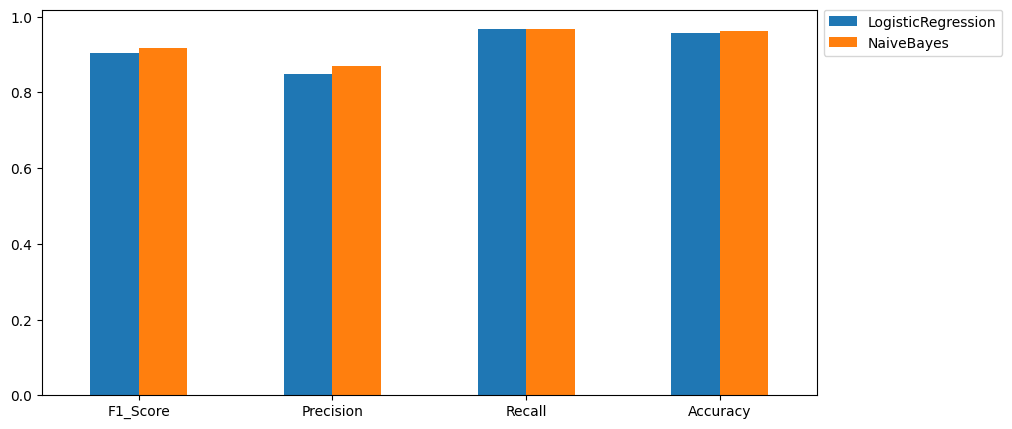

In [ ]:
# Gráfico da tabela de métricas
resultado = tabela_metricas.plot(kind = 'bar', rot = 0, figsize = (10, 5))
resultado.legend(bbox_to_anchor = (1, 1.02), loc = 'upper left');

In [ ]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}

f1_dict["LogisticRegression"] = f1_score(r2, y2)
precision_dict["LogisticRegression"] = precision_score(r2, y2)
recall_dict["LogisticRegression"] = recall_score(r2, y2)
accuracy_dict['LogisticRegression'] = accuracy_score(r2, y2)

f1_dict["NaiveBayes"] = f1_score(r4, y2)
precision_dict["NaiveBayes"] = precision_score(r4, y2)
recall_dict["NaiveBayes"] = recall_score(r4, y2)
accuracy_dict['NaiveBayes'] = accuracy_score(r4, y2)

# Os nomes das chaves serão os nomes dos dicionários
chaves = f1_dict, precision_dict, recall_dict, accuracy_dict

# Métricas
metricas = ['F1_Score', 'Precision', 'Recall', 'Accuracy']

# Dataframe
tabela_metricas = pd.DataFrame(chaves)

# Índice
tabela_metricas.index = metricas

# Tabela de métricas
tabela_metricas

,LogisticRegression,NaiveBayes
F1_Score,0.904679,0.916571
Precision,0.849241,0.869848
Recall,0.967862,0.968599
Accuracy,0.957919,0.962765


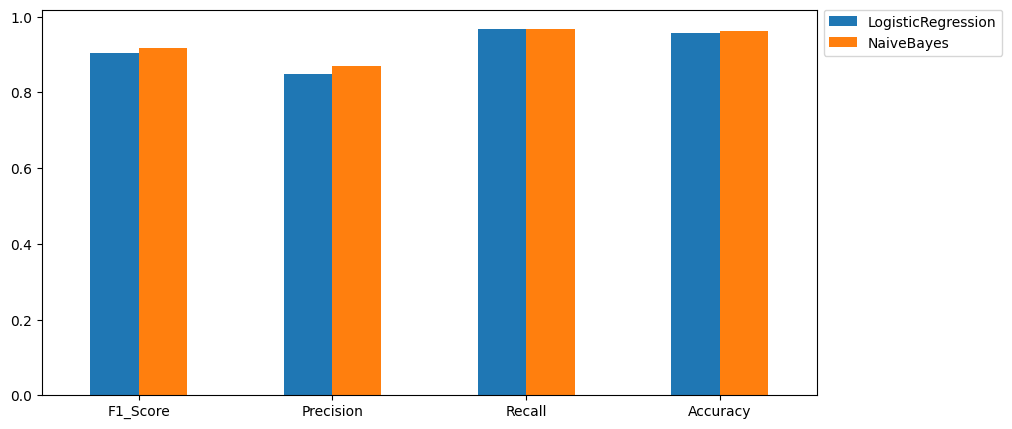

In [ ]:
# Gráfico da tabela de métricas
resultado = tabela_metricas.plot(kind = 'bar', rot = 0, figsize = (10, 5))
resultado.legend(bbox_to_anchor = (1, 1.02), loc = 'upper left');